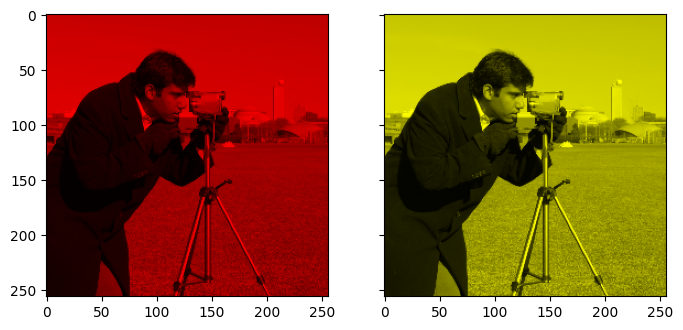

In [1]:
import matplotlib.pyplot as plt
from skimage import data
from skimage import color
from skimage import img_as_float, img_as_ubyte

grayscale_image = img_as_float(data.camera()[::2, ::2])
image = color.gray2rgb(grayscale_image)

red_multiplier = [1, 0, 0]
yellow_multiplier = [1, 1, 0]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True, sharey=True)
ax1.imshow(red_multiplier * image)
ax2.imshow(yellow_multiplier * image)

plt.show()

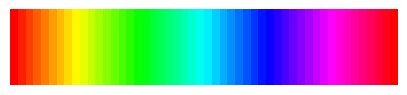

In [2]:
import numpy as np

hue_gradient = np.linspace(0, 1)
hsv = np.ones(shape=(1, len(hue_gradient), 3), dtype=float)
hsv[:, :, 0] = hue_gradient

all_hues = color.hsv2rgb(hsv)

fig, ax = plt.subplots(figsize=(5, 2))
# Set image extent so hues go from 0 to 1 and the image is a nice aspect ratio.
ax.imshow(
    all_hues, extent=(0 - 0.5 / len(hue_gradient), 1 + 0.5 / len(hue_gradient), 0, 0.2)
)
ax.set_axis_off()

In [3]:
def colorize(image, hue, saturation=1):
    """Add color of the given hue to an RGB image.

    By default, set the saturation to 1 so that the colors pop!
    """
    hsv = color.rgb2hsv(image)
    hsv[:, :, 1] = saturation
    hsv[:, :, 0] = hue
    return color.hsv2rgb(hsv)

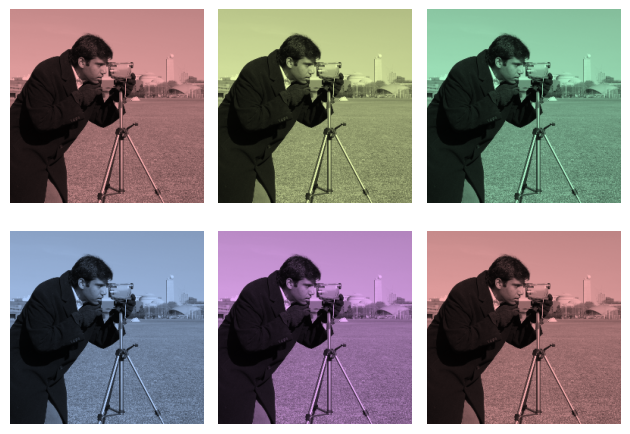

In [4]:
hue_rotations = np.linspace(0, 1, 6)

fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True)

for ax, hue in zip(axes.flat, hue_rotations):
    # Turn down the saturation to give it that vintage look.
    tinted_image = colorize(image, hue, saturation=0.3)
    ax.imshow(tinted_image, vmin=0, vmax=1)
    ax.set_axis_off()
fig.tight_layout()

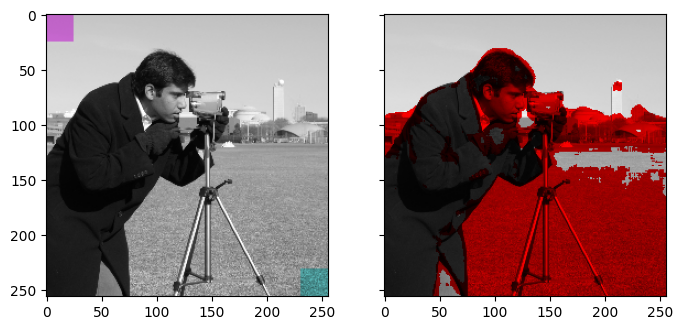

In [5]:
from skimage.filters import rank

# Square regions defined as slices over the first two dimensions.
top_left = (slice(25),) * 2
bottom_right = (slice(-25, None),) * 2

sliced_image = image.copy()
sliced_image[top_left] = colorize(image[top_left], 0.82, saturation=0.5)
sliced_image[bottom_right] = colorize(image[bottom_right], 0.5, saturation=0.5)

# Create a mask selecting regions with interesting texture.
noisy = rank.entropy(img_as_ubyte(grayscale_image), np.ones((9, 9)))
textured_regions = noisy > 4.25
# Note that using `colorize` here is a bit more difficult, since `rgb2hsv`
# expects an RGB image (height x width x channel), but fancy-indexing returns
# a set of RGB pixels (# pixels x channel).
masked_image = image.copy()
masked_image[textured_regions, :] *= red_multiplier

fig, (ax1, ax2) = plt.subplots(
    ncols=2, nrows=1, figsize=(8, 4), sharex=True, sharey=True
)
ax1.imshow(sliced_image)
ax2.imshow(masked_image)

plt.show()